# Tarea 1
### Ejercicio 3

## Jonathan Alexis Urrutia Anguiano       41401102-5

In [1]:
from pylab import*
%matplotlib inline

Se resolverá la siguiente ecuación 
$$\ddot x +\frac{1}{10}\dot x +4\sin(x) = \frac{1}{2}\sin(\omega t)$$
Para esto es necesario escribirla como una ecuación de primer orden, es decir, con estos cambios de variables

\begin{align}
  u_1 &= x,    \\
u_2 &= \dot x,             
\end{align}
 resolver 
\begin{align}
 u_1' &=  u_2 \\
u_2' &=  \frac{1}{2}\sin(\omega t) -\frac{1}{10}u_2 -4\sin(u_1)
\end{align}

Se puede además carlcular la derivada del sistema de ecuaciones respecto del tiempo y el jacobiano, que serán utilizados más adelante para el método de Taylor de 2do orden:
\begin{align}
\frac{d\vec u}{dt} =\left(\begin{array}{c} 0\\ \frac{\omega}{2}\cos(\omega t)\end{array}\right) 
\;\;\; \mathbb{J} = \left(\begin{array}{c c} 0 & 1 \\ -4\cos(\ u_1) & -\frac{1}{10}    \end{array}\right) 
\end{align}

In [2]:
def osc(y,t,w):
    return array([y[1],0.5*sin(w*t)-0.1*y[1]-4*sin(y[0])])

def d_osc(y,t,w):
    return array([0,0.5*w*cos(w*t)]), array([[0,1],[-4*cos(y[0]),-0.1]])  

A diferencia de los ejercicios pasados, aquí la función a resolver pide el parámetro $\omega$ y por lo tanto hay que modificar a los integradores de la siguiente manera

In [3]:
def euler(func, x_0,intervalo,args=0,h=0.01):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    if args==0:
        for i in xrange(len(tiempo)-1):
            y[i+1,:] = y[i,:]+ h* func(y[i,:],tiempo[i])
    else:
        for i in xrange(len(tiempo)-1):
            y[i+1,:] = y[i,:]+ h* func(y[i,:],tiempo[i],args)        
    return tiempo, y

In [4]:
def taylor2(func,d_func, x_0,intervalo,args=0,h=0.01):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    if args==0:
        for i in xrange(len(tiempo)-1):
            f = func(y[i,:],tiempo[i])   
            df,jac = d_func(y[i,:],tiempo[i])
            y[i+1,:] = y[i,:]+ h*f+ 0.5*(h**2)*(df+dot(jac,f))
    else:
        for i in xrange(len(tiempo)-1):
            f = func(y[i,:],tiempo[i],args)   
            df,jac = d_func(y[i,:],tiempo[i],args)
            y[i+1,:] = y[i,:]+ h*f+ 0.5*(h**2)*(df+dot(jac,f))
    return tiempo, y

In [5]:
def rk2(func, x_0, intervalo,args=0 ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h) 
    y = zeros((len(tiempo),len(x_0)))
    y[0,:] = x_0
    if args==0:
        for i in xrange(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i])
            k2 = func(y[i,:]+h*k1,tiempo[i]+h)
            y[i+1,:]= y[i,:]+0.5*h*(k1+k2)
    else:
        for i in xrange(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i],args)
            k2 = func(y[i,:]+h*k1,tiempo[i]+h,args)
            y[i+1,:]= y[i,:]+0.5*h*(k1+k2)
    return tiempo, y

In [6]:
def rk4(func, x_0, intervalo, args=0 ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    if args==0:
        for i in xrange(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i])
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempo)-1):
            k1 = func(y[i,:],tiempo[i],args)
            k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h,args)
            k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h,args)
            k4 = func(y[i,:]+h*k3,tiempo[i]+h,args)
            y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo, y    

Primero vamos a establecer que las condiciones iniciales sean $\dot x(0) = 1 \mbox{ y } x(0)=0$ y además $\omega = [1.0,1.1,1.2,...,2.9,3.0]$ y se graficar+an todos los casos. Más adelante se enseñarán menos resultados para comentar el comportamiento de la ec. según la $\omega$ dada.

In [7]:
omega=arange(1.0,3.1,0.1)
print omega

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4
  2.5  2.6  2.7  2.8  2.9  3. ]


### Método de Euler

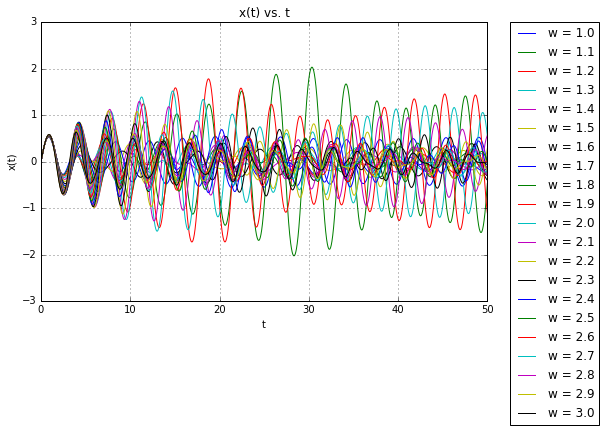

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in xrange(len(omega)):
    tE, solE = euler(osc,[0,1],[0,50],omega[i])
    plot(tE,solE[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

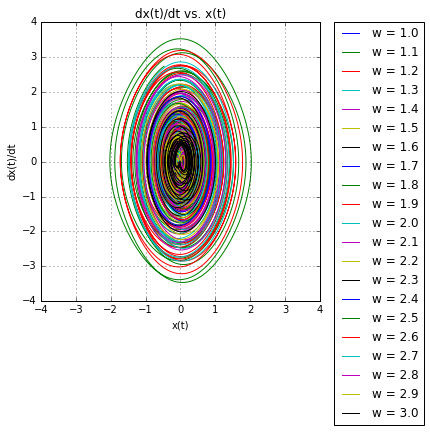

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in xrange(len(omega)):
    tE, solE = euler(osc,[0,1],[0,50],omega[i])
    plot(solE[:,0],solE[:,1],label = 'w = '+str(omega[i]))
    
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Taylor de 2do orden

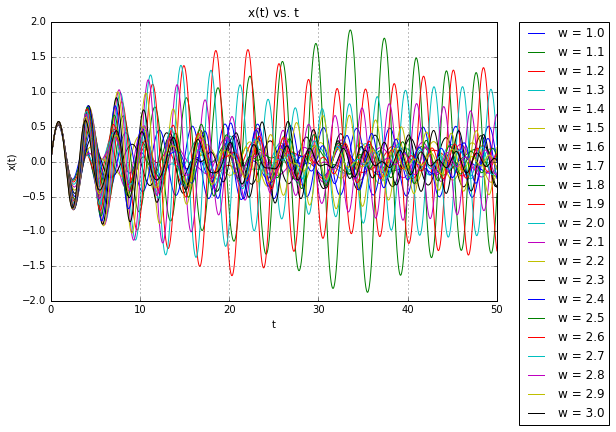

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in xrange(len(omega)):
    tT, solT = taylor2(osc,d_osc,[0,1],[0,50],omega[i])
    plot(tT,solT[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

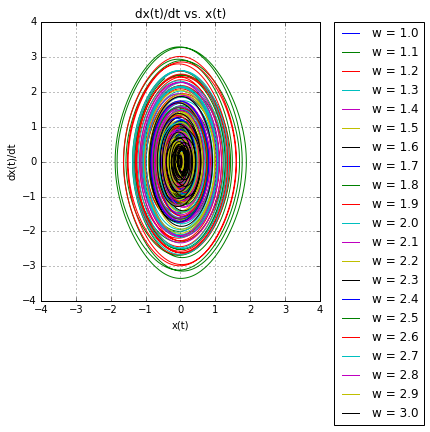

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in xrange(len(omega)):
    tT, solT = taylor2(osc,d_osc,[0,1],[0,50],omega[i])
    plot(solT[:,0],solT[:,1],label = 'w = '+str(omega[i]))
    
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Runge-Kutta de 2do orden

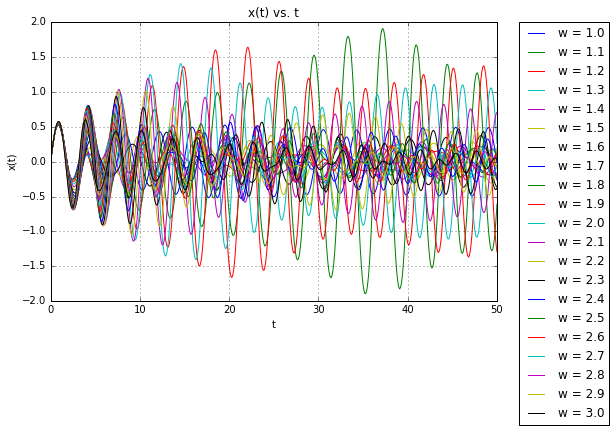

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in xrange(len(omega)):
    tRK2, solRK2 = rk2(osc,[0,1],[0,50],omega[i])
    plot(tRK2,solRK2[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

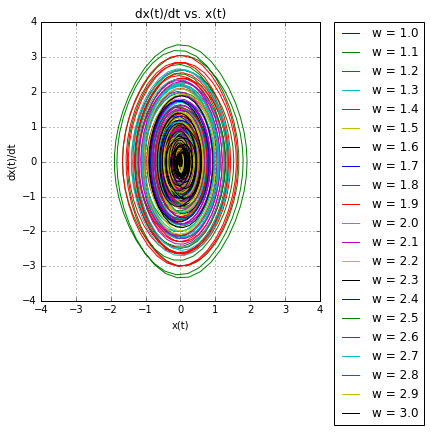

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in xrange(len(omega)):
    t, solRK2 = rk2(osc,[0,1],[0,50],omega[i])
    plot(solRK2[:,0],solRK2[:,1],label = 'w = '+str(omega[i]))

title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Runge-Kutta de 4to orden

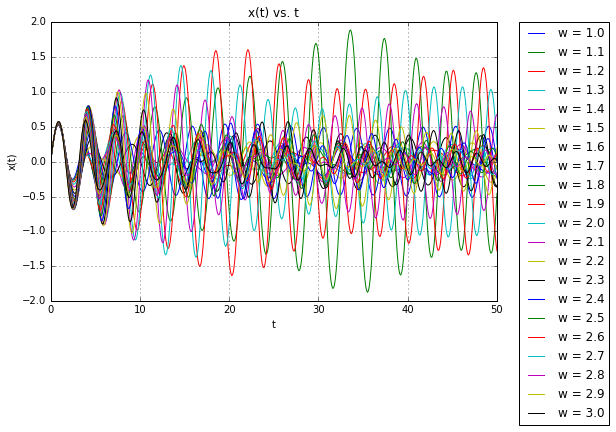

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
for i in xrange(len(omega)):
    tRK4, solRK4 = rk4(osc,[0,1],[0,50],omega[i])
    plot(tRK4,solRK4[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

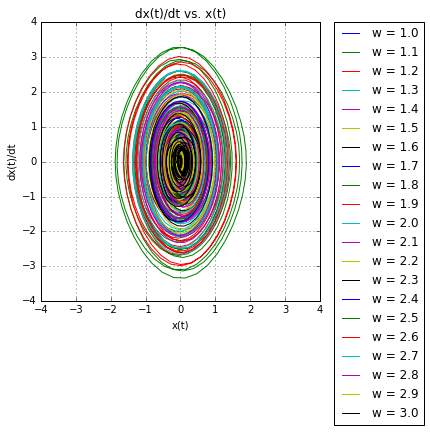

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
for i in xrange(len(omega)):
    t, solRK4 = rk4(osc,[0,1],[0,50],omega[i])
    plot(solRK4[:,0],solRK4[:,1],label = 'w = '+str(omega[i]))

title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Comparación de $\omega$

In [16]:
omega=arange(1.0,3.1,0.5)
print omega

[ 1.   1.5  2.   2.5  3. ]


### Método de Euler

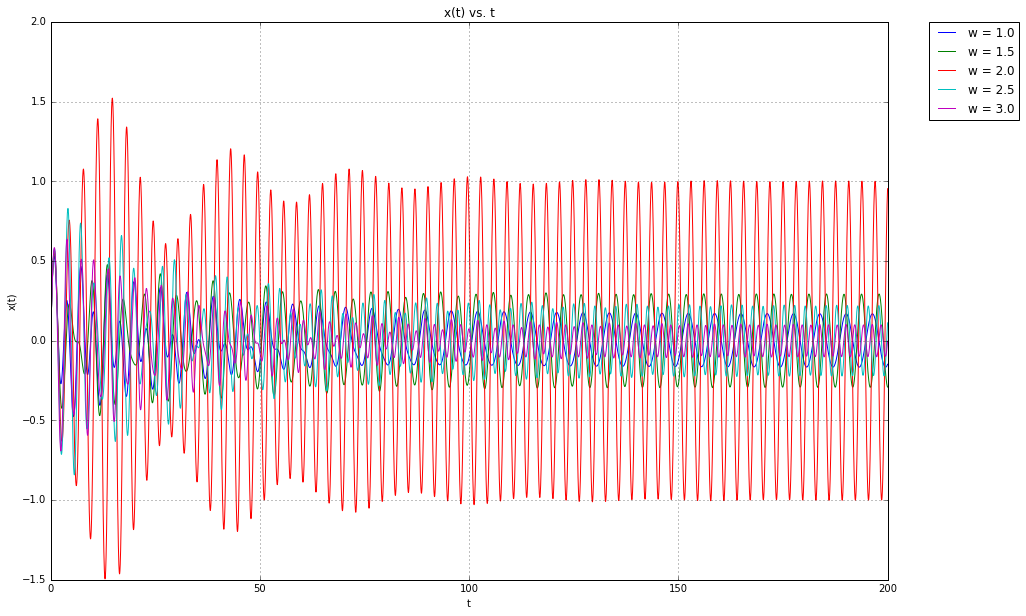

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in xrange(len(omega)):
    tE, solE = euler(osc,[0,1],[0,200],omega[i])
    plot(tE,solE[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

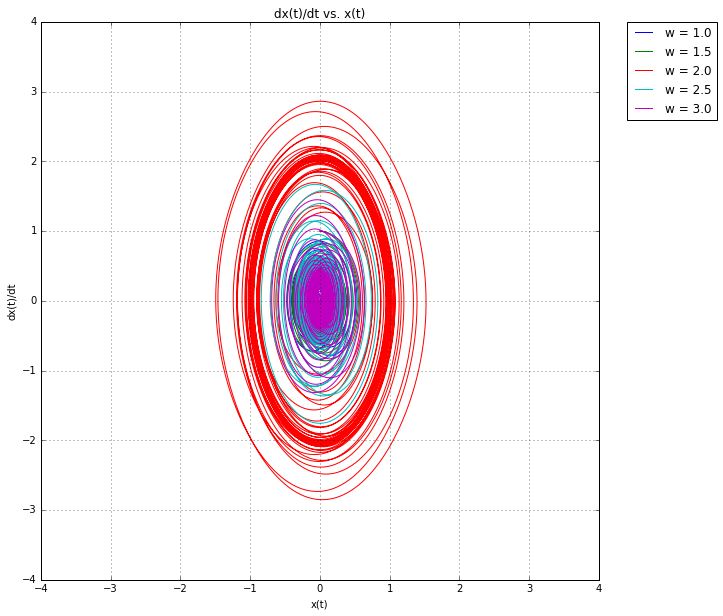

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in xrange(len(omega)):
    tE, solE = euler(osc,[0,1],[0,200],omega[i])
    plot(solE[:,0],solE[:,1],label = 'w = '+str(omega[i]))
    
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Taylor de 2do orden

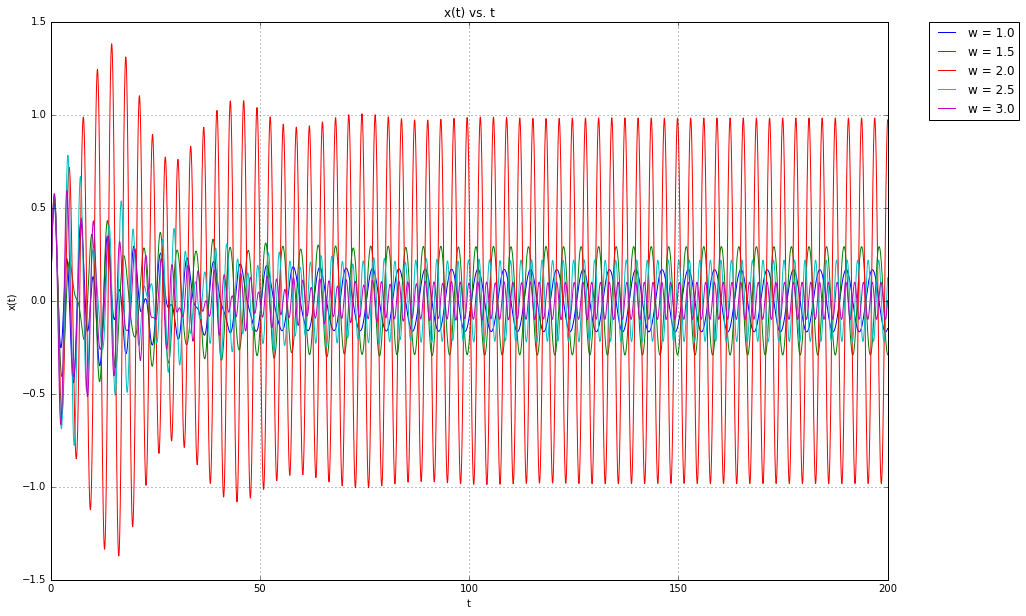

In [27]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in xrange(len(omega)):
    tT, solT = taylor2(osc,d_osc,[0,1],[0,200],omega[i])
    plot(tT,solT[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

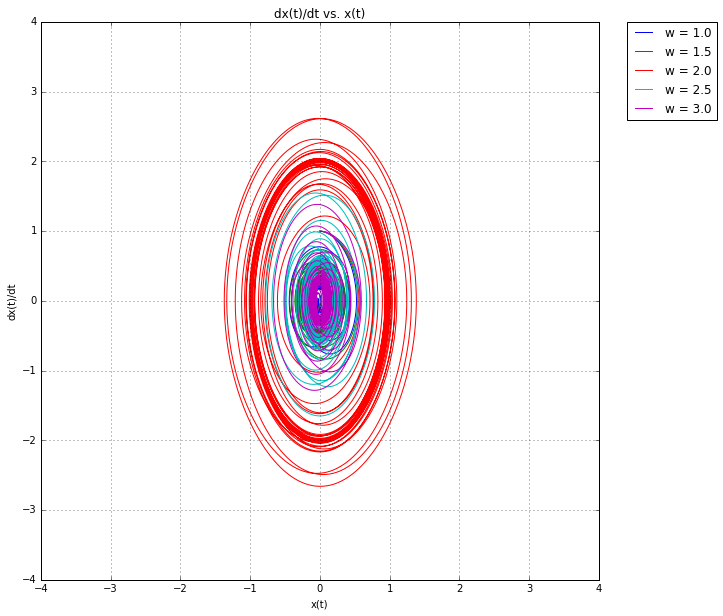

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in xrange(len(omega)):
    tT, solT = taylor2(osc,d_osc,[0,1],[0,200],omega[i])
    plot(solT[:,0],solT[:,1],label = 'w = '+str(omega[i]))
    
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Runge-Kutta de 2do orden

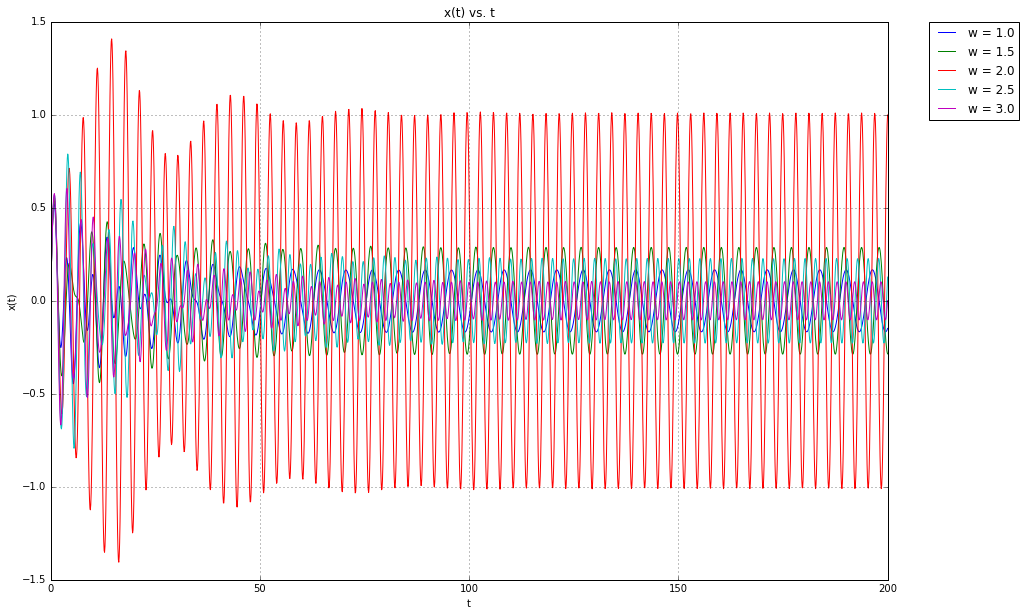

In [29]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in xrange(len(omega)):
    tRK2, solRK2 = rk2(osc,[0,1],[0,200],omega[i])
    plot(tRK2,solRK2[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

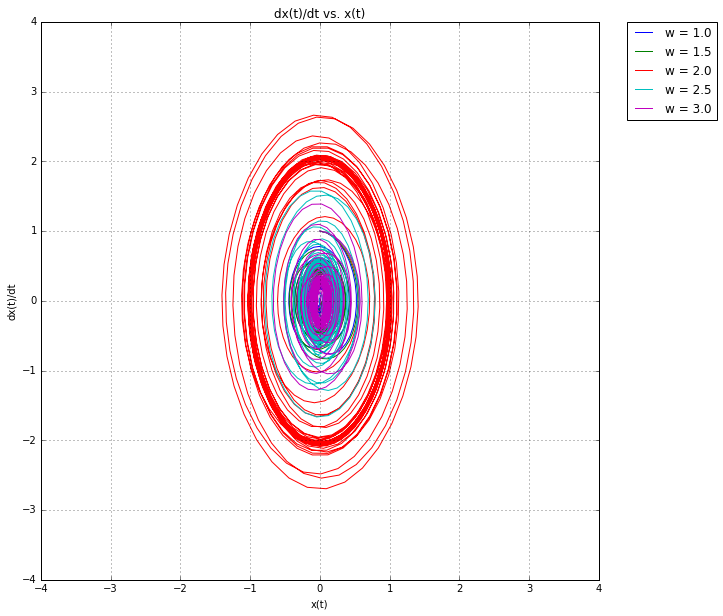

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in xrange(len(omega)):
    t, solRK2 = rk2(osc,[0,1],[0,200],omega[i])
    plot(solRK2[:,0],solRK2[:,1],label = 'w = '+str(omega[i]))

title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

### Runge-Kutta de 4to orden

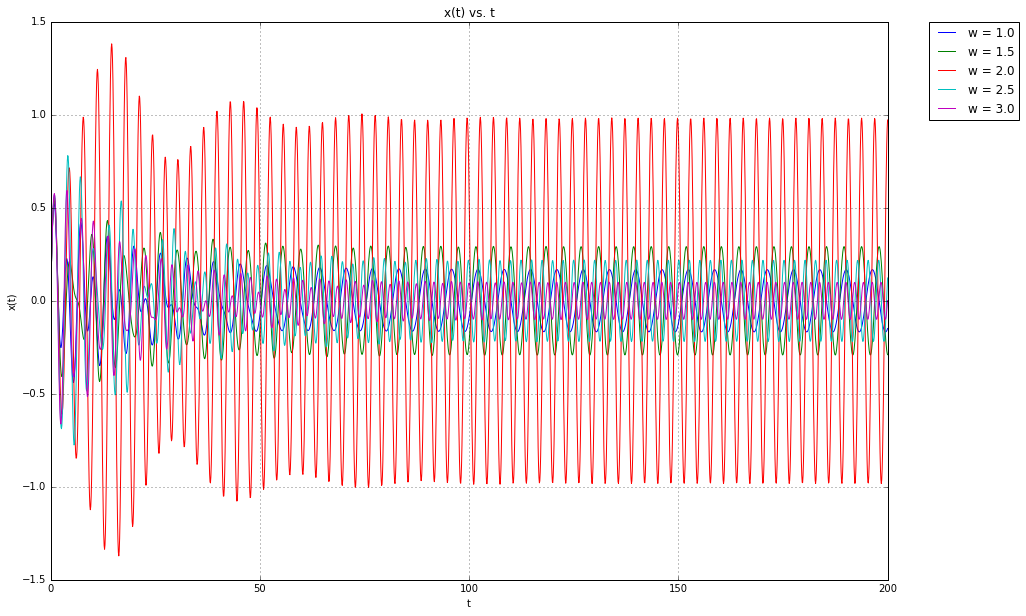

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
for i in xrange(len(omega)):
    tRK4, solRK4 = rk4(osc,[0,1],[0,200],omega[i])
    plot(tRK4,solRK4[:,0],label = 'w = '+str(omega[i]))

grid(True)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
show()

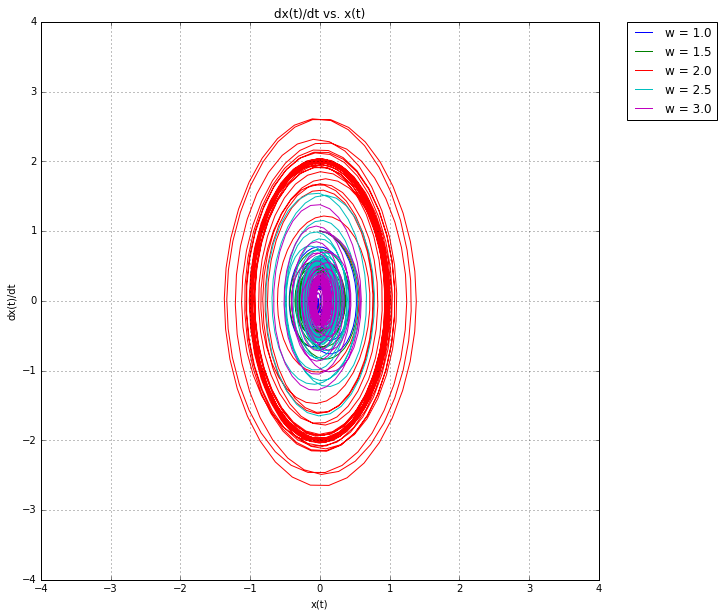

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in xrange(len(omega)):
    t, solRK4 = rk4(osc,[0,1],[0,200],omega[i])
    plot(solRK4[:,0],solRK4[:,1],label = 'w = '+str(omega[i]))

title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
zoom=4
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
grid(True) 
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
show()

En estas últimas gráficas, se muestran menos frecuencias que en las primeras calculadas sin embargo, es apreciable que en todos los métodos el comportamiento de la solución conforme pasa el tiempo, conferge a un valor máximo de amplitud de oscilación. Además se aprecia a observar que la frecuencia de resonancia está alrededor de $\omega=2.0$ tanto en el espacio fáse, como en la gráfica de $x vs. t$.

Ya que en estas últimas gráficas se utilizó intervalo de tiempo mayor, se puede observar que para tiempo largos, las soluciones dadas por los métodos se reducen al del oscilador armónico y que el efecto de la resonancia o del frenado sólo es significativo al inicio.

Comparando los métodos, el de Runge-kutta y el de Taylor predicen que la solución a la ecuación oscilará en tiempos muy grandes en valores cercanos pero menores a la unidad --para $\omega=2.0$-- mas los de Euler y Runge-Kutta de segundo orden indican que esta oscilación será para tiempo grandes mayores a uno. Cabe señalar que para los métodos de Runge-Kutta el paso utilizado es de $h=0.1$ y para Taylor y Euler es de $h=0.01$. Es decir, que aunque se tenga un paso más chico, el error de Euler de primer orden es significativo en comparación al de 4to orden de RK; para RK de orden dos es recomendable usar un paso más pequeño puesto que co Taylor del mismo orden se logró reproducir losresultados de un método que tiene más presición.